# Digit Recognizer

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
df.describe(include='all')

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Missing Value Treatment

In [9]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

<AxesSubplot:>

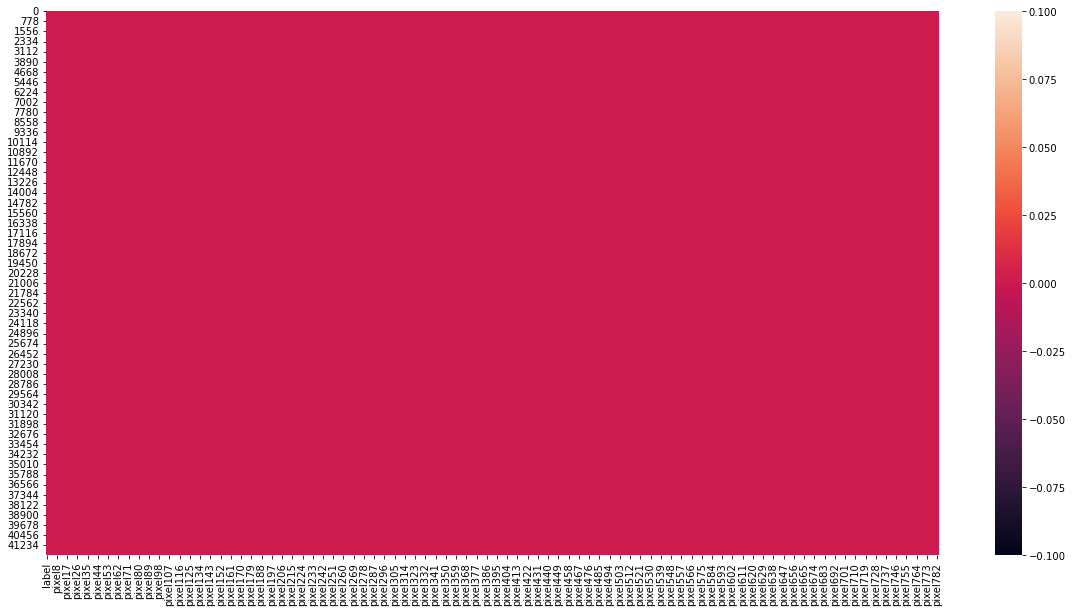

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [10]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

<AxesSubplot:xlabel='label', ylabel='count'>

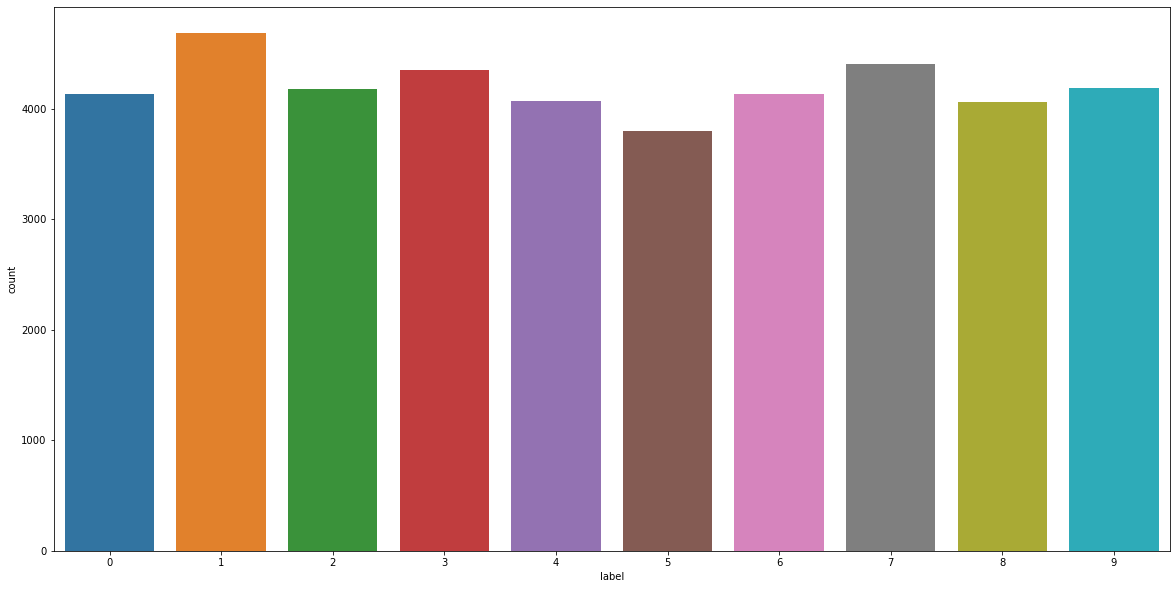

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='label',data=df)

# Splitting the dataset into X and Y

In [12]:
# converting the dataset in np array and Splitting into X and Y
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values

In [13]:
X[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  18,  30, 137, 137, 192,  86,  72,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  13,  86, 250, 254, 254, 254, 254, 217,
       246, 151,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16, 179, 254, 254, 254, 25

In [14]:
Y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

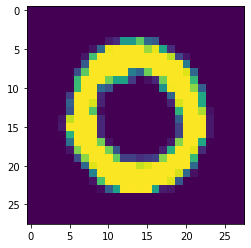

In [15]:
plt.imshow(X[1].reshape(28,28))

the label od the image is:  1


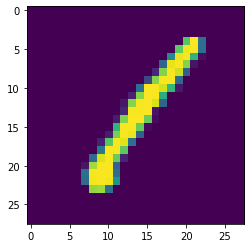

the label od the image is:  0


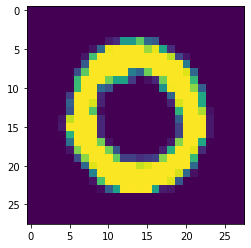

the label od the image is:  1


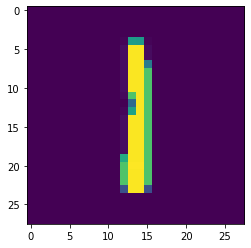

the label od the image is:  4


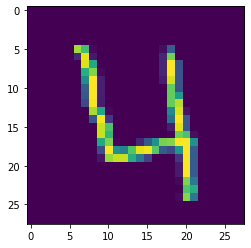

the label od the image is:  0


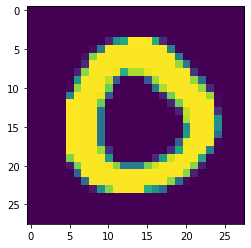

In [16]:
for i in range(5):
    plt.imshow(X[i].reshape(28,28))
    print('the label od the image is: ',Y[i])
    plt.show()

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [18]:
X_train=X_train/255
X_test=X_test/255

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(29400, 784)
(29400,)
(12600, 784)
(12600,)


In [20]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

# Feature Scalling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Creating ANN

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense  

In [24]:
# Initializing the ANN
ann_clf = Sequential()

In [25]:
# Adding the input layer and first hidden layer
ann_clf.add(Dense(activation='relu',input_dim=784,units=128))
ann_clf.add(Dense(activation='relu',units=128))
ann_clf.add(Dense(activation='relu',units=64))
ann_clf.add(Dense(activation='relu',units=32))

In [26]:
# Adding the output layer 
ann_clf.add(Dense(activation='softmax',units=10))

In [27]:
ann_clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 127,658
Trainable params: 127,658
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=ann_clf.fit(X_train,Y_train,validation_split=0.33,batch_size=32,epochs=25)

Epoch 1/25
616/616 [==============================] - 6s 8ms/step - loss: 0.4303 - accuracy: 0.8719 - val_loss: 0.2078 - val_accuracy: 0.9397
Epoch 2/25
616/616 [==============================] - 4s 6ms/step - loss: 0.1646 - accuracy: 0.9496 - val_loss: 0.1748 - val_accuracy: 0.9485
Epoch 3/25
616/616 [==============================] - 4s 7ms/step - loss: 0.1108 - accuracy: 0.9660 - val_loss: 0.1597 - val_accuracy: 0.9523
Epoch 4/25
616/616 [==============================] - 4s 7ms/step - loss: 0.0832 - accuracy: 0.9727 - val_loss: 0.1458 - val_accuracy: 0.9562
Epoch 5/25
616/616 [==============================] - 4s 6ms/step - loss: 0.0618 - accuracy: 0.9796 - val_loss: 0.1481 - val_accuracy: 0.9601
Epoch 6/25
616/616 [==============================] - 4s 6ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.1455 - val_accuracy: 0.9639
Epoch 7/25
616/616 [==============================] - 5s 7ms/step - loss: 0.0402 - accuracy: 0.9866 - val_loss: 0.1386 - val_accuracy: 0.9643
Epoch 

In [30]:
Y_pred = ann_clf.predict(X_test)

394/394 [==============================] - 1s 3ms/step


In [31]:
Y_pred[5]

array([3.8141528e-11, 7.2999709e-09, 3.2270915e-11, 1.3351010e-08,
       1.8323813e-06, 4.0691730e-09, 1.2279712e-13, 7.5768580e-06,
       8.7818520e-08, 9.9999046e-01], dtype=float32)

In [32]:
np.argmax(Y_pred[0])

1

In [33]:
Y_pred=Y_pred.argmax(axis=1)

In [34]:
Y_pred

array([1, 3, 0, ..., 9, 3, 6], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

In [36]:
cm

array([[1202,    0,    1,    0,    0,    0,    2,    1,    5,    2],
       [   0, 1397,    6,    3,    2,    0,    1,    6,    5,    2],
       [   4,    5, 1213,    2,    5,    0,    1,   13,    9,    6],
       [   0,    2,   14, 1226,    1,   12,    0,   12,    6,   11],
       [   1,    0,    4,    0, 1168,    0,    2,    1,    4,   29],
       [   3,    2,    1,   16,    2, 1075,    4,    2,   10,    6],
       [   4,    2,    2,    0,    4,    4, 1220,    2,    4,    0],
       [   1,    0,    6,    0,    8,    1,    2, 1283,    1,   13],
       [   0,    4,    6,   20,    2,    3,    3,    2, 1180,    7],
       [   4,    2,    0,    7,    9,    3,    0,    9,   11, 1264]],
      dtype=int64)

In [37]:
accuracy

0.9704761904761905

In [38]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1213
           1       0.99      0.98      0.99      1422
           2       0.97      0.96      0.97      1258
           3       0.96      0.95      0.96      1284
           4       0.97      0.97      0.97      1209
           5       0.98      0.96      0.97      1121
           6       0.99      0.98      0.99      1242
           7       0.96      0.98      0.97      1315
           8       0.96      0.96      0.96      1227
           9       0.94      0.97      0.95      1309

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



# Plotting Train vs Test Loss

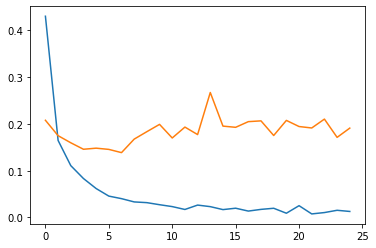

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Plotting Train vs Test Accuracy

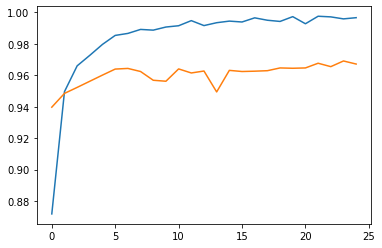

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [41]:
#Task -- predicting the accuracy of test dataset.

In [42]:
X_test[100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

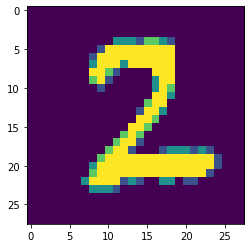

In [43]:
plt.imshow(X_test[100].reshape(28,28))

In [44]:
ann_clf.predict(X_test[100].reshape(1,784)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([2], dtype=int64)

# Model Building

In [45]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression()
logi_model.fit(X_train,Y_train)

LogisticRegression()

In [46]:
print('Logistic Regression Model Score',logi_model.score(X_train,Y_train)*100)

Logistic Regression Model Score 94.26190476190476


# Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
Y_pred=dt.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [50]:
accuracy

0.8488888888888889

# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(X_train,Y_train)

RandomForestClassifier()

In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [53]:
accuracy

0.8488888888888889

# Confusion Matrix

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
confusion_matrix(Y_test, Y_pred)

array([[1097,    0,   19,   20,   10,   21,   20,    7,   12,    7],
       [   4, 1333,   11,   13,    7,   14,    8,    7,   18,    7],
       [  21,   21, 1006,   43,   22,   25,   24,   31,   48,   17],
       [  12,   16,   59, 1022,   19,   52,   12,   17,   45,   30],
       [   9,    4,   14,   12, 1053,   18,    9,   14,   26,   50],
       [  21,   15,   15,   53,   20,  898,   32,   12,   37,   18],
       [  15,    4,   19,    6,   17,   41, 1095,    1,   34,   10],
       [   6,    7,   34,   15,   22,    6,    3, 1178,    7,   37],
       [  21,   24,   47,   47,   41,   50,   30,    8,  927,   32],
       [   8,    7,   11,   32,   53,   28,   11,   38,   34, 1087]],
      dtype=int64)

In [56]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1213
           1       0.93      0.94      0.93      1422
           2       0.81      0.80      0.81      1258
           3       0.81      0.80      0.80      1284
           4       0.83      0.87      0.85      1209
           5       0.78      0.80      0.79      1121
           6       0.88      0.88      0.88      1242
           7       0.90      0.90      0.90      1315
           8       0.78      0.76      0.77      1227
           9       0.84      0.83      0.83      1309

    accuracy                           0.85     12600
   macro avg       0.85      0.85      0.85     12600
weighted avg       0.85      0.85      0.85     12600



# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [58]:
Y_pred = model_knn.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [60]:
accuracy

0.9681746031746031

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
Y_pred = dt.predict(X_test)

In [63]:
confusion_matrix(Y_test, Y_pred)

array([[1203,    0,    0,    0,    1,    0,    3,    0,    6,    0],
       [   0, 1395,    7,    5,    5,    1,    3,    3,    3,    0],
       [   5,    4, 1213,    4,    6,    0,    5,    7,   13,    1],
       [   2,    4,   19, 1207,    1,   14,    2,   12,   15,    8],
       [   2,    0,    2,    0, 1183,    0,    5,    1,    3,   13],
       [   5,    1,    1,   14,    4, 1076,    8,    0,    8,    4],
       [   5,    2,    1,    0,    2,   10, 1220,    0,    2,    0],
       [   0,    3,   12,    2,   14,    0,    0, 1262,    3,   19],
       [   3,    3,    5,   17,    5,    8,    6,    2, 1171,    7],
       [   6,    4,    4,   16,   23,    3,    1,   10,    9, 1233]],
      dtype=int64)

In [64]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1213
           1       0.99      0.98      0.98      1422
           2       0.96      0.96      0.96      1258
           3       0.95      0.94      0.95      1284
           4       0.95      0.98      0.96      1209
           5       0.97      0.96      0.96      1121
           6       0.97      0.98      0.98      1242
           7       0.97      0.96      0.97      1315
           8       0.95      0.95      0.95      1227
           9       0.96      0.94      0.95      1309

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



# SVM

In [65]:
from sklearn.svm import SVC
model_sv = SVC()
model_sv.fit(X_train,Y_train)

SVC()

In [66]:
Y_pred = model_sv.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [68]:
accuracy

0.9746031746031746

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
Y_pred = dt.predict(X_test)

In [71]:
confusion_matrix(Y_test, Y_pred)

array([[1203,    0,    0,    0,    1,    0,    3,    0,    6,    0],
       [   0, 1395,    7,    5,    5,    1,    3,    3,    3,    0],
       [   5,    4, 1213,    4,    6,    0,    5,    7,   13,    1],
       [   2,    4,   19, 1207,    1,   14,    2,   12,   15,    8],
       [   2,    0,    2,    0, 1183,    0,    5,    1,    3,   13],
       [   5,    1,    1,   14,    4, 1076,    8,    0,    8,    4],
       [   5,    2,    1,    0,    2,   10, 1220,    0,    2,    0],
       [   0,    3,   12,    2,   14,    0,    0, 1262,    3,   19],
       [   3,    3,    5,   17,    5,    8,    6,    2, 1171,    7],
       [   6,    4,    4,   16,   23,    3,    1,   10,    9, 1233]],
      dtype=int64)

In [72]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1213
           1       0.99      0.98      0.98      1422
           2       0.96      0.96      0.96      1258
           3       0.95      0.94      0.95      1284
           4       0.95      0.98      0.96      1209
           5       0.97      0.96      0.96      1121
           6       0.97      0.98      0.98      1242
           7       0.97      0.96      0.97      1315
           8       0.95      0.95      0.95      1227
           9       0.96      0.94      0.95      1309

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600

